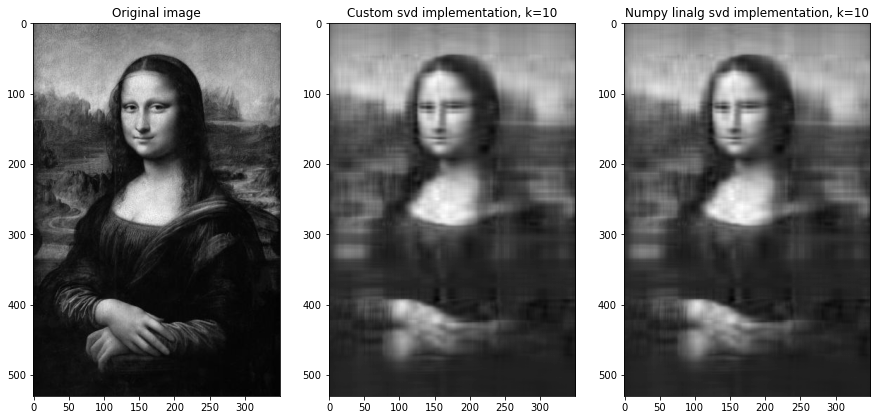

In [2]:
# -*- coding: utf-8 -*-
"""
Preparation DataLab:
    Code from https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications
    Image from https://www.revolutiondatasystems.com/blog/grayscale-or-bitonal-which-is-a-better-method-for-scanning-my-records
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg



def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

def im2double(im):
    info = np.iinfo(im.dtype)
    return im.astype(float)/info.max



# grayscale image (is still saved with 3 channels so I take the first one)
img = plt.imread("Mona_Lisa_GS.jpg")[:,:,0]



gray_channel = im2double(img)

#my implementation
U, S, V = svd(gray_channel)

#linalg library implementation
U_, S_, V_ = np.linalg.svd(gray_channel)

#number of singular values kept
k = 10

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

plt.ion()

fig.canvas.draw()

U_trunc, S_trunc, Vt_trunc = truncate(U, S, V, k)
_U_trunc, _S_trunc, _Vt_trunc = truncate(U_, S_, V_, k)

my_channel = 255 * U_trunc @ np.diag(S_trunc) @ Vt_trunc
linalg_channel = 255 * _U_trunc @ np.diag(_S_trunc) @ _Vt_trunc

ax1.title.set_text(f"Original image")
ax1.imshow(gray_channel, cmap='gray')
    
ax2.title.set_text(f"Custom svd implementation, k={k}")
ax2.imshow(my_channel, cmap='gray')


ax3.title.set_text(f"Numpy linalg svd implementation, k={k}")
ax3.imshow(linalg_channel, cmap='gray')
